
***
# <h1 align = 'center'> Heetch Casablanca - Social Data Analysis</h1> 
#### <center> 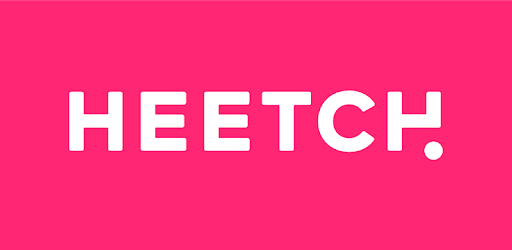 
#### <center> Prof.Hadrien Commenges </center>
#### <center> Ecole Centrale de Casablanca  </center>
#### <center> February 2022 </center>
#### <right> **Realized by :** Afaf EL KALAI

***

# Project objectives :
The purpose of this project is to conduct a spatial data analysis based on individual data of heetch's drivers in the region of Casablanca in order to design and implement a method of home detection.

At the end of this project, you can reflect concretely on the technical possibilities and social issues related to such analyses.

# Short Description
Heetch is a French startup that organizes VTC services in several cities around the world including Casablanca. The data is provided for Casablanca for the month of March 2019 with one GPS point per minute and per vehicle. This data includes a driver ID (driver_id), a time variable (location_at_local_time) and geographic coordinates (longitude and latitude).

Additional data are added for the analysis: extraction of OpenStreetMap data directly from R (or you can directly use the file "osmfeatures.Rds"), and administrative division of Morocco downloaded from [the GADM website](https://gadm.org/download_country.html) ("casabound.geojson").

# 1. Import Libraries

In [ ]:
install.packages("sf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘units’


Warning message in install.packages("sf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("sf"):
“installation of package ‘sf’ had non-zero exit status”


In [ ]:
install.packages("osmdata")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘proj4’, ‘PROJ’, ‘crsmeta’, ‘reproj’, ‘sp’




In [ ]:
install.packages("leaflet")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘lazyeval’, ‘terra’, ‘gridExtra’, ‘crosstalk’, ‘htmlwidgets’, ‘markdown’, ‘png’, ‘raster’, ‘viridis’, ‘leaflet.providers’




In [ ]:
install.packages("mapsf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘units’, ‘sf’


Warning message in install.packages("mapsf"):
“installation of package ‘units’ had non-zero exit status”
Warning message in install.packages("mapsf"):
“installation of package ‘sf’ had non-zero exit status”
Warning message in install.packages("mapsf"):
“installation of package ‘mapsf’ had non-zero exit status”


In [ ]:
system('sudo add-apt-repository ppa:ubuntugis/ubuntugis-unstable')
system('sudo apt-get update')
system('sudo apt-get install libudunits2-dev libgdal-dev libgeos-dev libproj-dev')
install.packages('sf')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘units’




In [ ]:
install.packages("mapsf")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
install.packages("egg")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
library(dplyr)
library(sf)           # manipulation des données spatiales
library(osmdata)      # extraction des données OpenStreetMap
library(leaflet)      # visualisation interactive avec leaflet
library(mapsf)        # cartographie statistique
library(lubridate)    # manipulation des dates
library(tidyverse)    # méta-package d'Hadley Wickham


# 2. Load Data

In [ ]:
# The geographic bound of casablanca.
casaBound <- st_read("casabound.geojson")

Reading layer `casabound' from data source `/content/casabound.geojson' using driver `GeoJSON'
Simple feature collection with 1 feature and 1 field
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -7.739249 ymin: 33.49177 xmax: -7.455459 ymax: 33.65016
Geodetic CRS:  WGS 84


In [ ]:
# OSM data of roads, tramway and Tram stops
osmFeatures <- readRDS("osmfeatures.rds")

In [ ]:
# Point location at local time of heetch drivers
heetchPoints <- readRDS("heetchmarchcrop.Rds")

In [ ]:
print(heetchPoints, max.levels=0)

Simple feature collection with 4640838 features and 7 fields
Attribute-geometry relationship: 2 constant, 0 aggregate, 0 identity, 5 NA's
Geometry type: POINT
Dimension:     XY
Bounding box:  xmin: -7.732124 ymin: 33.49239 xmax: -7.462863 ymax: 33.64182


old-style crs object detected; please recreate object with a recent sf::st_crs()



Geodetic CRS:  WGS 84


old-style crs object detected; please recreate object with a recent sf::st_crs()



# A tibble: 4,640,838 × 8
   driver_id   location_at_local_…             geometry Date               
 * <chr>       <dttm>                       <POINT [°]> <dttm>             
 1 54f25ae2-9… 2019-03-01 00:03:57 (-7.629493 33.58942) 2019-03-01 00:03:57
 2 e99f5a59-3… 2019-03-01 00:29:25 (-7.615367 33.58698) 2019-03-01 00:29:25
 3 cd443d0e-a… 2019-03-01 00:31:38 (-7.658829 33.54039) 2019-03-01 00:31:38
 4 cbb30118-b… 2019-03-01 00:48:01 (-7.615695 33.58303) 2019-03-01 00:48:01
 5 d34e899b-1… 2019-03-01 01:17:19 (-7.613126 33.57853) 2019-03-01 01:17:19
 6 255db2aa-d… 2019-03-01 02:10:42 (-7.661868 33.59373) 2019-03-01 02:10:42
 7 4ba2b82e-0… 2019-03-01 02:51:28 (-7.613303 33.59409) 2019-03-01 02:51:28
 8 866b0f35-f… 2019-03-01 02:57:54 (-7.678526 33.59375) 2019-03-01 02:57:54
 9 e3bbe5b4-c… 2019-03-01 03:15:08 (-7.630483 33.58231) 2019-03-01 03:15:08
10 a2377800-d… 2019-03-01 03:37:46 (-7.656556 33.60505) 2019-03-01 03:37:46
# … with 4,640,828 more rows, and 4 more variables: YMD <chr>,

### Casablanca Map :

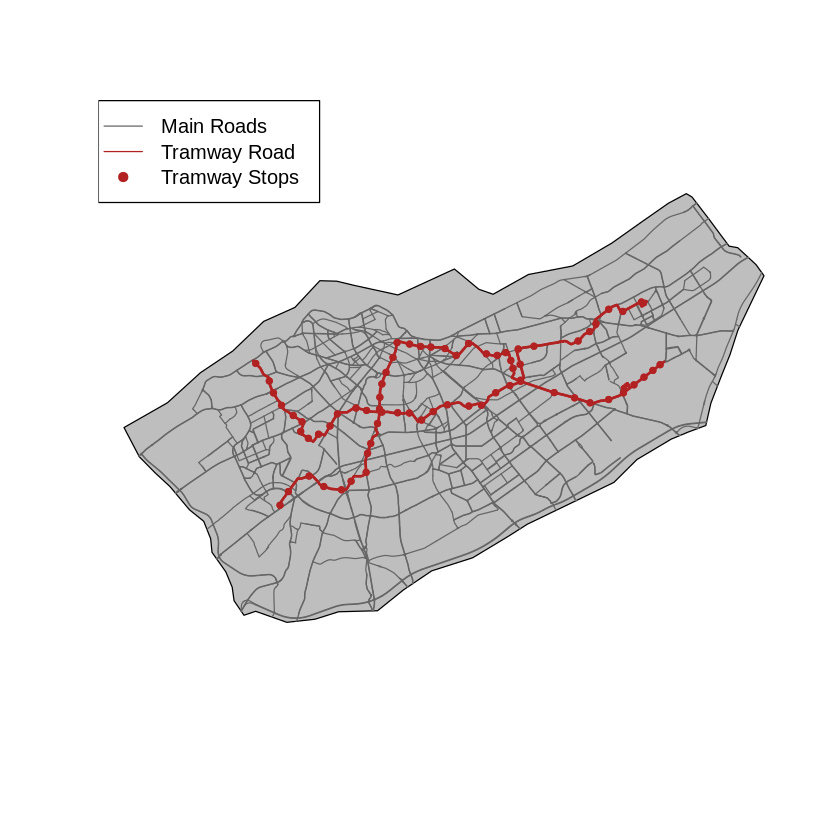

In [ ]:
plot(casaBound$geometry, col = "grey")
plot(osmFeatures$roads$geometry, col = "grey40", add = TRUE)
plot(osmFeatures$tramway$geometry, col = "firebrick", lwd = 2, add = TRUE) #lwd line width
plot(osmFeatures$tramstop$geometry, col = "firebrick", pch = 20, add = TRUE) # pch point size
legend('topleft', legend=c("Main Roads", "Tramway Road","Tramway Stops"),lty = c(1, 1,0),pch = c(NA,NA,19),col = c("grey40","firebrick","firebrick"))
       

### Projection Merchich

For more accurate , we will use Merchich projection which is a projected coordinate system for Morocco onshore north of 35 grads North (31°30'N).

Let's change the projection from EPSG 4326 --> EPSG 26191

In [ ]:
casaBound$geometry
st_crs(casaBound) ## ID["EPSG",4326]

POLYGON ((-7.739249 33.56374, -7.719969 33.5729...

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. 

Geometry set for 1 feature 
Geometry type: POLYGON
Dimension:     XY
Bounding box:  xmin: -7.739249 ymin: 33.49177 xmax: -7.455459 ymax: 33.65016
Geodetic CRS:  WGS 84

Coordinate Reference System:
  User input: WGS 84 
  wkt:
GEOGCRS["WGS 84",
    DATUM["World Geodetic System 1984",
        ELLIPSOID["WGS 84",6378137,298.257223563,
            LENGTHUNIT["metre",1]]],
    PRIMEM["Greenwich",0,
        ANGLEUNIT["degree",0.0174532925199433]],
    CS[ellipsoidal,2],
        AXIS["geodetic latitude (Lat)",north,
            ORDER[1],
            ANGLEUNIT["degree",0.0174532925199433]],
        AXIS["geodetic longitude (Lon)",east,
            ORDER[2],
            ANGLEUNIT["degree",0.0174532925199433]],
    ID["EPSG",4326]]

In [ ]:
casaBoundProj<-st_transform(x=casaBound,crs= 26191)
st_crs(casaBoundProj) ## ID["EPSG",26191]

Coordinate Reference System:
  User input: EPSG:26191 
  wkt:
PROJCRS["Merchich / Nord Maroc",
    BASEGEOGCRS["Merchich",
        DATUM["Merchich",
            ELLIPSOID["Clarke 1880 (IGN)",6378249.2,293.466021293627,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",4261]],
    CONVERSION["Nord Maroc",
        METHOD["Lambert Conic Conformal (1SP)",
            ID["EPSG",9801]],
        PARAMETER["Latitude of natural origin",37,
            ANGLEUNIT["grad",0.0157079632679489],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-6,
            ANGLEUNIT["grad",0.0157079632679489],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.999625769,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False n

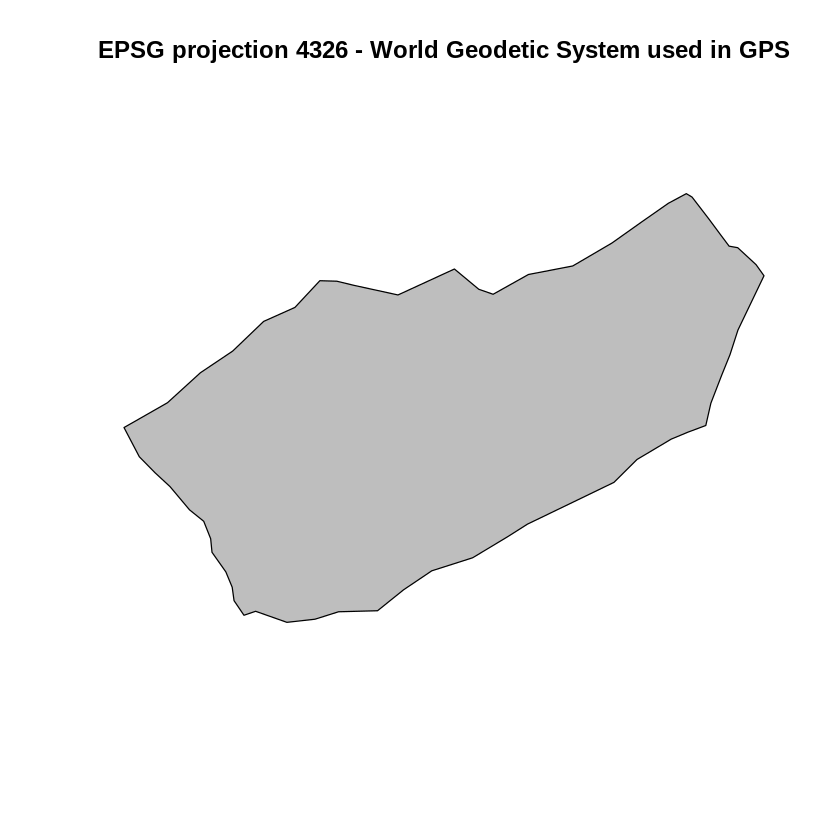

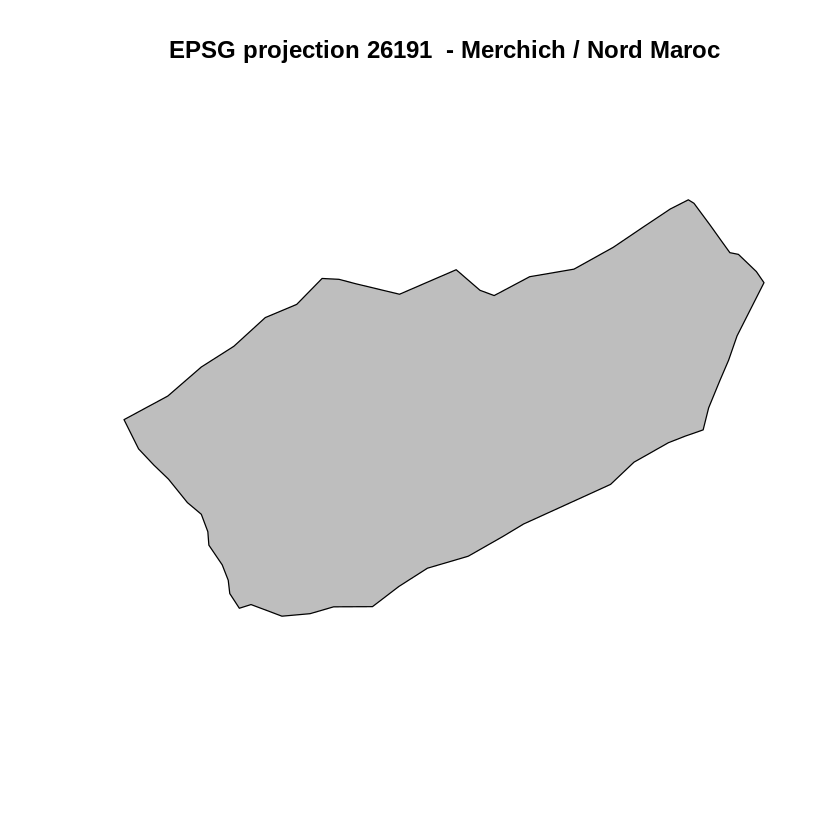

In [ ]:
proj1 <- plot(casaBound$geometry, main= "EPSG projection 4326 - World Geodetic System used in GPS", col = "grey")

proj2 <- plot(casaBoundProj$geometry, main= "EPSG projection 26191  - Merchich / Nord Maroc", col = "grey")

par(mfrow=c(1,2))    # set the plotting area into a 1*2 array

# Glean some insights out of the data

Here we can see that most heetch drivers are active between **21:00-00:00** with a **peak at 22:00**.

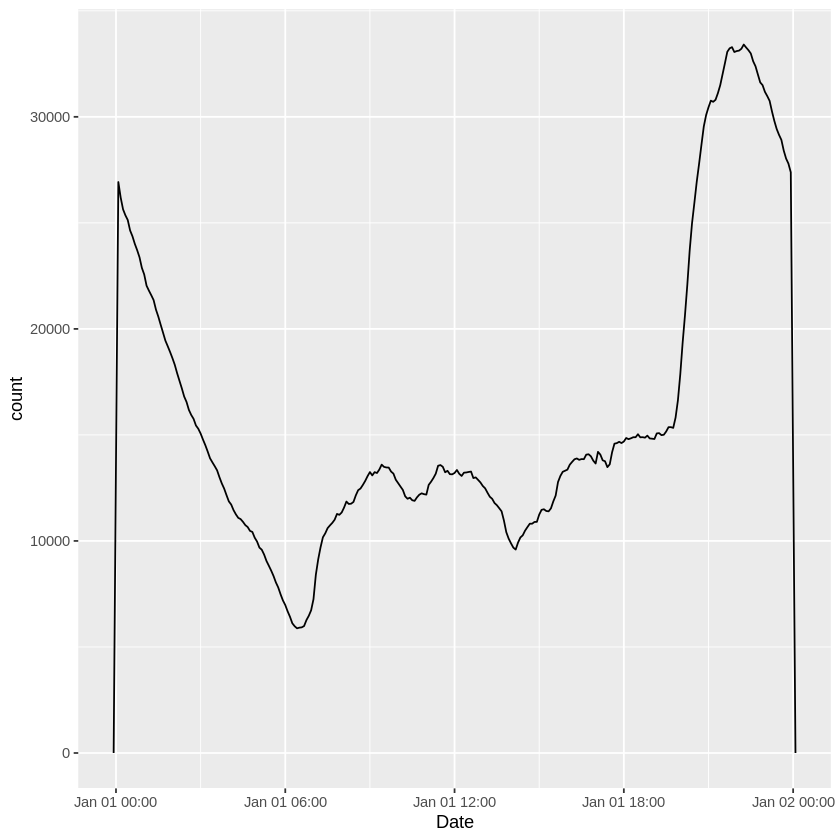

In [ ]:
 heetchPoints %>% 
  mutate(Date = update(Date, yday = 1)) %>% 
  ggplot(aes(Date)) +
    geom_freqpoly(binwidth = 300)

Heetch drivers are less active during working days except for Fridays. Generally, in arabic countries, people usually go out during Fridays and Saturdays and prefer to rest at home during Sundays.

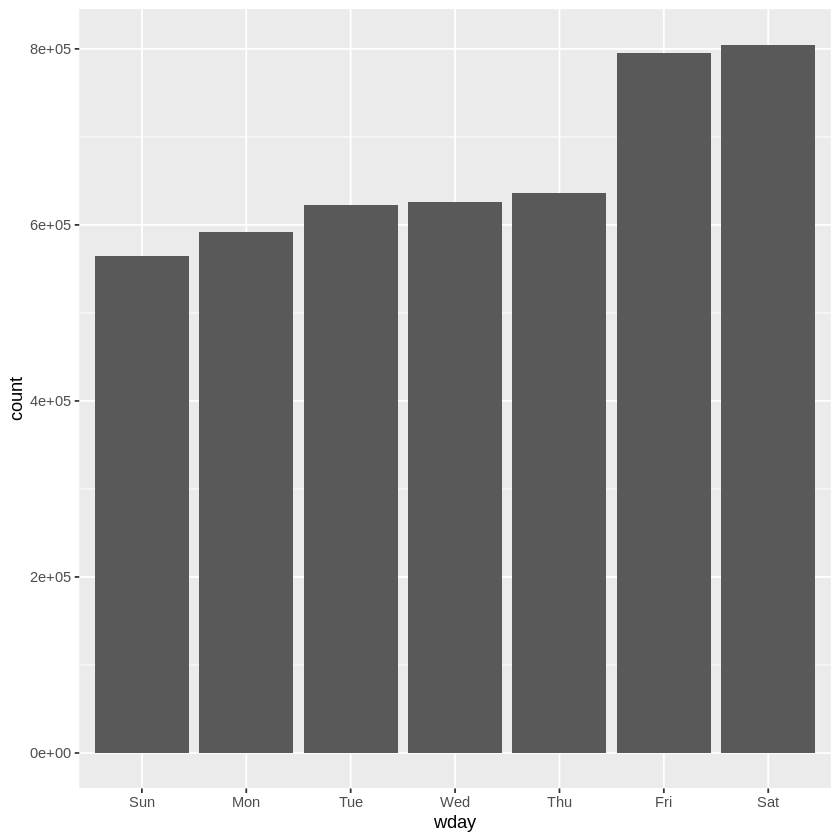

In [ ]:
heetchPoints %>% 
  mutate(wday = wday(Date, label = TRUE)) %>% 
  ggplot(aes(x = wday)) +
    geom_bar()

# 3. Home detection method


Before digging into the details of the implementation of this method, let's first do some preliminary design.

### Creation of time variables (POSIX time)

In [ ]:
# Date
heetchPoints$Date <- ymd_hms( heetchPoints$location_at_local_time, tz="UTC")
heetchPoints$Date[1]

[1] "2019-03-01 00:03:57 UTC"

In [ ]:
heetchPoints$Date[1] %>% as.numeric()

[1] 1551398637

In [ ]:
# year-Month-Day
heetchPoints$YMD <- substr(heetchPoints$location_at_local_time, 1, 10)
heetchPoints$YMD[1] 

[1] "2019-03-01"

In [ ]:
# Hour-Minute-Second
heetchPoints$HMS <- substr(heetchPoints$location_at_local_time, 12, 19)
heetchPoints$HMS[1] 

[1] "00:03:57"

In [ ]:
# Hour-Minute
heetchPoints$HM <- substr(heetchPoints$location_at_local_time, 12, 16)
heetchPoints$HM[1] 

[1] "00:03"

In [ ]:
# Hour
heetchPoints$HOUR <- substr(heetchPoints$location_at_local_time, 12, 13)
heetchPoints$HOUR[1] 

[1] "00"

Using this, let's select heetchpoints during the First March 2020 at 8:00 AM.

In [ ]:
heetchPoints %>% filter(YMD=="2019-03-01" & HOUR=="08") %>% head()

old-style crs object detected; please recreate object with a recent sf::st_crs()

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 .

driver_id,location_at_local_time,geometry,Date,YMD,HMS,HM,HOUR
<chr>,<dttm>,<POINT [°]>,<dttm>,<chr>,<chr>,<chr>,<chr>
ac43da30-550a-4658-a6fa-716bbc0a1bb4,2019-03-01 08:10:06,POINT (-7.600853 33.55786),2019-03-01 08:10:06,2019-03-01,08:10:06,08:10,08
484dfc81-2d4d-4d3a-99d0-acf2ba0bba75,2019-03-01 08:26:47,POINT (-7.638954 33.53025),2019-03-01 08:26:47,2019-03-01,08:26:47,08:26,08
4d386c0f-3c29-4f28-85fd-7dc6c9fe5991,2019-03-01 08:49:48,POINT (-7.653034 33.57668),2019-03-01 08:49:48,2019-03-01,08:49:48,08:49,08
17bc0b72-040a-4743-8f3d-3143fb6d1921,2019-03-01 08:19:10,POINT (-7.631179 33.5961),2019-03-01 08:19:10,2019-03-01,08:19:10,08:19,08
3a9294be-793f-4e21-be95-e9d6dc5f504a,2019-03-01 08:31:43,POINT (-7.622497 33.58585),2019-03-01 08:31:43,2019-03-01,08:31:43,08:31,08
eac7c462-5803-40a9-8876-b09eb6449612,2019-03-01 08:00:03,POINT (-7.650417 33.52625),2019-03-01 08:00:03,2019-03-01,08:00:03,08:00,08


### Make Grid to Visualize geospatial location data 

old-style crs object detected; please recreate object with a recent sf::st_crs()



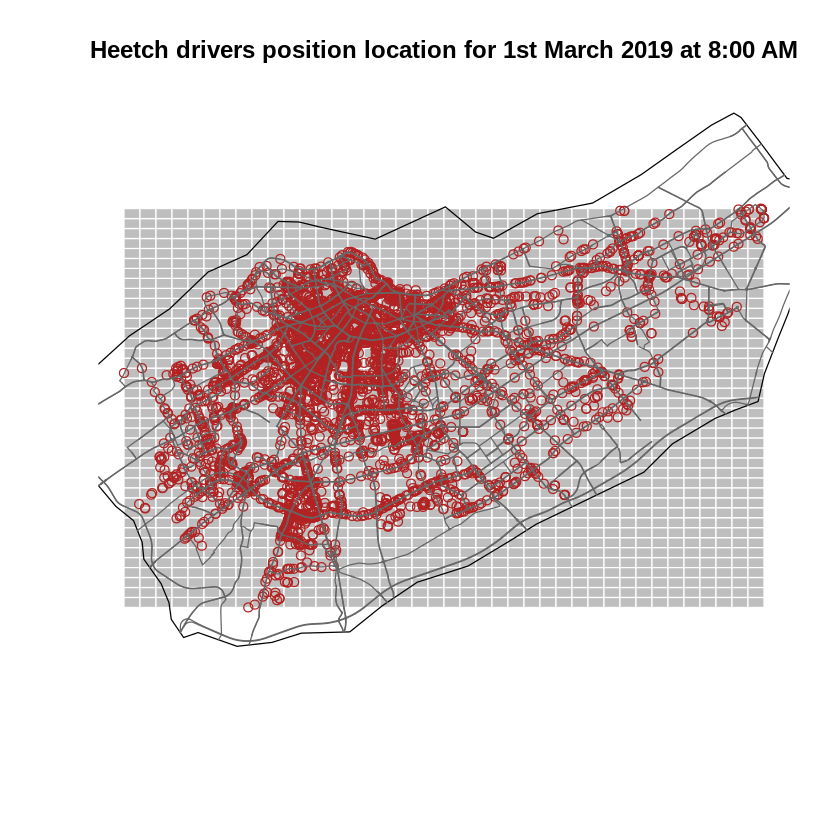

In [ ]:
# Grid representing drivers location position for : 2019-03-01 at 8:00 h

heetch_pos=heetchPoints %>% filter(YMD=="2019-03-01" & HOUR=="08")
Casa_grid_geom <- st_make_grid(x=heetch_pos,n=40)
casaGrid <- st_sf(IDGRID = seq(1, length(Casa_grid_geom), 1),
                 geometry = Casa_grid_geom)
plot(casaGrid$geometry,col = "grey",border = "white", main= "Heetch drivers position location for 1st March 2019 at 8:00 AM")
plot(heetch_pos$geometry, col = "firebrick",add=TRUE)
plot(casaBound$geometry,add=TRUE)
plot(osmFeatures$roads$geometry, col = "grey40", add = TRUE)

### Drivers presence on each grid  

In [ ]:
pointsInGrid <- st_contains(x = casaGrid, y = heetch_pos ) # How much position point in each grid - typeof(pointsInGrid)== list
casaGrid$nbrInGrid <- sapply(X = pointsInGrid, FUN =length )
print(casaGrid, max.levels=0) 

[1] 88 82 75 74 68


In [ ]:
# Max position points in one grid is 88
sort(x = casaGrid$nbrInGrid, decreasing = TRUE)[0:5]

[1] 88 82 75 74 68

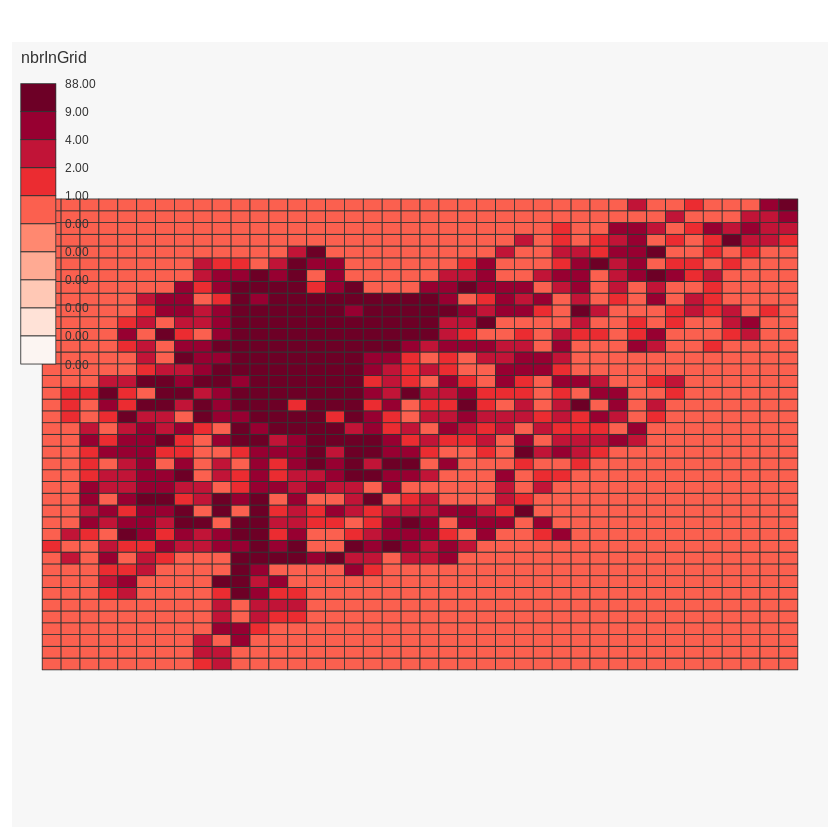

In [ ]:
mf_map(x=casaGrid,var ="nbrInGrid", breaks="quantile",nbreaks=10 ,type ="choro" ,
       pal = rev(hcl.colors(n = 10, palette = "Reds")))

### Implementation of home detection method

The main idea behind our home detection method is : Compute a vector of time differences for all days of a given driver and then select the point just before the largest intervals. These intervals are most likely the sleep times so we may assume that the last registered location position before the driver turned off his phone is actually his home adress.

In [ ]:
# We choose randomly one driver
oneDriver <- heetchPoints %>% 
  filter(driver_id == "54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0") %>% 
  arrange(location_at_local_time)

old-style crs object detected; please recreate object with a recent sf::st_crs()



In [ ]:
oneDriver %>% tail()

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

driver_id,location_at_local_time,geometry,Date,YMD,HMS,HM,HOUR
<chr>,<dttm>,<POINT [°]>,<dttm>,<chr>,<chr>,<chr>,<chr>
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:36:24,POINT (-7.641109 33.59494),2019-03-30 23:36:24,2019-03-30,23:36:24,23:36,23
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:37:24,POINT (-7.640903 33.59484),2019-03-30 23:37:24,2019-03-30,23:37:24,23:37,23
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:38:25,POINT (-7.640968 33.59487),2019-03-30 23:38:25,2019-03-30,23:38:25,23:38,23
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:39:25,POINT (-7.641027 33.59486),2019-03-30 23:39:25,2019-03-30,23:39:25,23:39,23
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:40:25,POINT (-7.641051 33.59483),2019-03-30 23:40:25,2019-03-30,23:40:25,23:40,23
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-30 23:59:57,POINT (-7.639459 33.58448),2019-03-30 23:59:57,2019-03-30,23:59:57,23:59,23


In [ ]:
# Compute time intervals between two consecutive location points
vecDif <- oneDriver$location_at_local_time[2:nrow(oneDriver)] - 
  oneDriver$location_at_local_time[1:nrow(oneDriver)-1]

# selection of points with threshold at 8h (= 480 minutes)
idOff <- which(as.numeric(vecDif) > 480)
idOff

[1]  176  496  765 1262 1664 2177 2565 2852 3166 3513 3990 4365 4752 5062 5371
[16] 5854 6226 6482 6712 6997 7360 7858 8238 8704 9134 9472

In [ ]:
homeList <- oneDriver[idOff, ]
homeList %>% head()

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

driver_id,location_at_local_time,geometry,Date,YMD,HMS,HM,HOUR
<chr>,<dttm>,<POINT [°]>,<dttm>,<chr>,<chr>,<chr>,<chr>
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-01 05:45:43,POINT (-7.634867 33.59918),2019-03-01 05:45:43,2019-03-01,05:45:43,05:45,05
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-02 05:30:53,POINT (-7.635163 33.5994),2019-03-02 05:30:53,2019-03-02,05:30:53,05:30,05
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-03 05:18:37,POINT (-7.639341 33.58969),2019-03-03 05:18:37,2019-03-03,05:18:37,05:18,05
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-04 05:54:25,POINT (-7.635195 33.59954),2019-03-04 05:54:25,2019-03-04,05:54:25,05:54,05
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-05 05:33:25,POINT (-7.634706 33.59157),2019-03-05 05:33:25,2019-03-05,05:33:25,05:33,05
54f25ae2-9f19-489e-8c6d-ba8ede2f0ff0,2019-03-06 05:51:43,POINT (-7.630154 33.59821),2019-03-06 05:51:43,2019-03-06,05:51:43,05:51,05


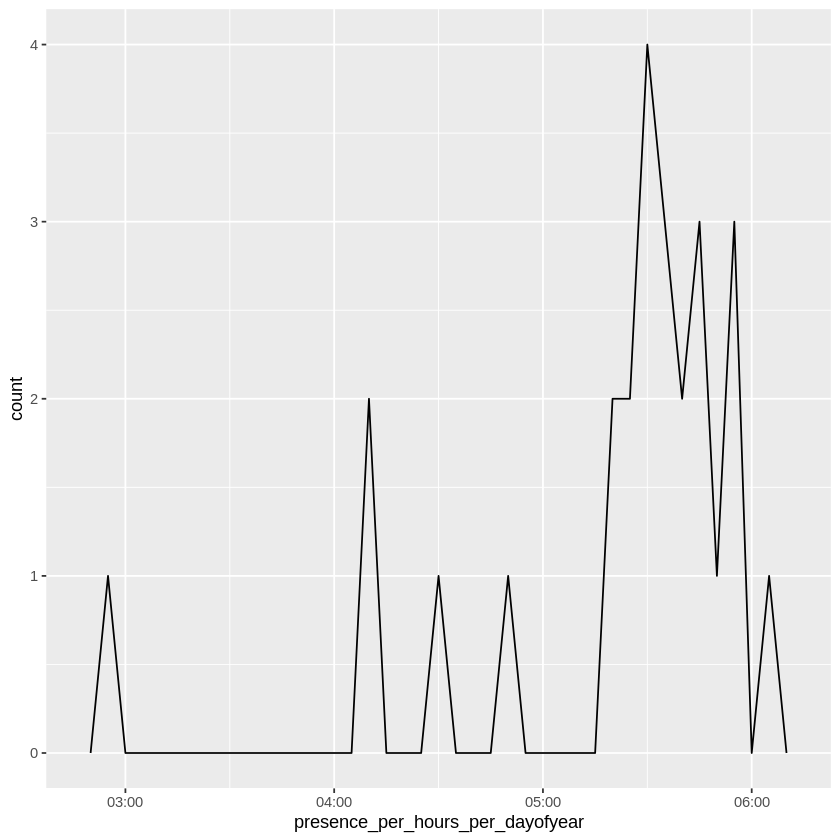

In [ ]:
 homeList %>% 
  mutate(presence_per_hours_per_dayofyear = update(location_at_local_time, yday = 1)) %>% # here we choose the first day of the year
  ggplot(aes(presence_per_hours_per_dayofyear)) +
    geom_freqpoly(binwidth = 300)

It looks like this driver is usually working night shifts and he returns home at 06:00 AM.

### Geolocation map of one driver

In [ ]:
if (system.file(package = "leaflet") == '') {
  install.packages("leaflet")
}
if (system.file(package = "htmlwidgets") == '') {
  install.packages("htmlwidgets")
}
if (system.file(package = "IRdisplay") == '') {
  install.packages("IRdisplay")
}

library(leaflet)
library(htmlwidgets)
library(IRdisplay)


In [ ]:
m = leaflet() %>% 
addTiles(urlTemplate = "http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png") %>% # colab compatibility
addCircles(data = homeList) 

saveWidget(m, 'home1.html', selfcontained = TRUE)

IaminColab<-TRUE

if(IaminColab){  # does not work in jupyter
  home1<-readLines("home1.html")
  home1<-gsub("%","%25",home1)
  home1<-gsub("#","%23",home1)
  home1<-gsub("\"","%22",home1)
  home1<-gsub("'" ,"%27",home1)
  home1<-gsub("\\n" ,"",home1)
  home1<-paste(home1, collapse="")
  display_html(paste0('<iframe src=',"\"data:text/html;charset=UTF-8,",home1," \" height=\"300\" width=\"500\"></iframe>") )
} else { # does not work in colab
  display_html('<iframe src="home1.html" width="800" height ="400"></iframe>')
}

leaflet <link href=%22data:text/css;charset=utf-8,%250A%252Eleaflet%252Dpane%252C%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%252C%250A%252Eleaflet%252Dtile%252Dcontainer%252C%250A%252Eleaflet%252Dpane%2520%253E%2520svg%252C%250A%252Eleaflet%252Dpane%2520%253E%2520canvas%252C%250A%252Eleaflet%252Dzoom%252Dbox%252C%250A%252Eleaflet%252Dimage%252Dlayer%252C%250A%252Eleaflet%252Dlayer%2520%257B%250Aposition%253A%2520absolute%253B%250Aleft%253A%25200%253B%250Atop%253A%25200%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250Aoverflow%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250A%252Dwebkit%252Duser%252Dselect%253A%2520none%253B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250Auser%252Dselect%253A%2520none%253B%250A%252Dwebkit%252Duser%252Ddrag%253A%2520none%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%2520%257B%250Aimage%252Drendering%253A%2520%252Dwebkit%252Doptimize%252Dcontrast%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%252Dcontainer%2520%257B%250Awidth%253A%25201600px%253B%250Aheight%253A%25201600px%253B%250A%252Dwebkit%252Dtransform%252Dorigin%253A%25200%25200%253B%250A%257D%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250Adisplay%253A%2520block%253B%250A%257D%250A%250A%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Doverlay%252Dpane%2520svg%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dmarker%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dshadow%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dtile%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520img%252Eleaflet%252Dimage%252Dlayer%2520%257B%250Amax%252Dwidth%253A%2520none%2520%2521important%253B%250Amax%252Dheight%253A%2520none%2520%2521important%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250Atouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%250Atouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520transparent%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520a%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520rgba%252851%252C%2520181%252C%2520229%252C%25200%252E4%2529%253B%250A%257D%250A%252Eleaflet%252Dtile%2520%257B%250Afilter%253A%2520inherit%253B%250Avisibility%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252Dloaded%2520%257B%250Avisibility%253A%2520inherit%253B%250A%257D%250A%252Eleaflet%252Dzoom%252Dbox%2520%257B%250Awidth%253A%25200%253B%250Aheight%253A%25200%253B%250A%252Dmoz%252Dbox%252Dsizing%253A%2520border%252Dbox%253B%250Abox%252Dsizing%253A%2520border%252Dbox%253B%250Az%252Dindex%253A%2520800%253B%250A%257D%250A%250A%252Eleaflet%252Doverlay%252Dpane%2520svg%2520%257B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dtile%252Dpane%2520%257B%2520z%252Dindex%253A%2520200%253B%2520%257D%250A%252Eleaflet%252Doverlay%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dshadow%252Dpane%2520%257B%2520z%252Dindex%253A%2520500%253B%2520%257D%250A%252Eleaflet%252Dmarker%252Dpane%2520%257B%2520z%252Dindex%253A%2520600%253B%2520%25

In [ ]:
pointsInGrid <- st_contains(x = casaGrid, y = homeList)
casaGrid$NPTS <- sapply(X = pointsInGrid, FUN = length)
homeZone <- casaGrid[which.max(casaGrid$NPTS), ]

m2 <- leaflet() %>% 
  addTiles(urlTemplate = "http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png") %>% 
  addPolygons(data = homeZone)

saveWidget(m2, 'home2.html', selfcontained = TRUE)

IaminColab<-TRUE

home2<-readLines("home2.html")
home2<-gsub("%","%25",demo)
home2<-gsub("#","%23",demo)
home2<-gsub("\"","%22",demo)
home2<-gsub("'" ,"%27",demo)
home2<-gsub("\\n" ,"",demo)
home2<-paste(home2, collapse="")
display_html(paste0('<iframe src=',"\"data:text/html;charset=UTF-8,",home2," \" height=\"300\" width=\"500\"></iframe>") )

leaflet <link href=%22data:text/css;charset=utf-8,%250A%252Eleaflet%252Dpane%252C%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%252C%250A%252Eleaflet%252Dtile%252Dcontainer%252C%250A%252Eleaflet%252Dpane%2520%253E%2520svg%252C%250A%252Eleaflet%252Dpane%2520%253E%2520canvas%252C%250A%252Eleaflet%252Dzoom%252Dbox%252C%250A%252Eleaflet%252Dimage%252Dlayer%252C%250A%252Eleaflet%252Dlayer%2520%257B%250Aposition%253A%2520absolute%253B%250Aleft%253A%25200%253B%250Atop%253A%25200%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250Aoverflow%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250A%252Dwebkit%252Duser%252Dselect%253A%2520none%253B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250Auser%252Dselect%253A%2520none%253B%250A%252Dwebkit%252Duser%252Ddrag%253A%2520none%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%2520%257B%250Aimage%252Drendering%253A%2520%252Dwebkit%252Doptimize%252Dcontrast%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%252Dcontainer%2520%257B%250Awidth%253A%25201600px%253B%250Aheight%253A%25201600px%253B%250A%252Dwebkit%252Dtransform%252Dorigin%253A%25200%25200%253B%250A%257D%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250Adisplay%253A%2520block%253B%250A%257D%250A%250A%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Doverlay%252Dpane%2520svg%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dmarker%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dshadow%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dtile%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520img%252Eleaflet%252Dimage%252Dlayer%2520%257B%250Amax%252Dwidth%253A%2520none%2520%2521important%253B%250Amax%252Dheight%253A%2520none%2520%2521important%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250Atouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%250Atouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520transparent%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520a%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520rgba%252851%252C%2520181%252C%2520229%252C%25200%252E4%2529%253B%250A%257D%250A%252Eleaflet%252Dtile%2520%257B%250Afilter%253A%2520inherit%253B%250Avisibility%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252Dloaded%2520%257B%250Avisibility%253A%2520inherit%253B%250A%257D%250A%252Eleaflet%252Dzoom%252Dbox%2520%257B%250Awidth%253A%25200%253B%250Aheight%253A%25200%253B%250A%252Dmoz%252Dbox%252Dsizing%253A%2520border%252Dbox%253B%250Abox%252Dsizing%253A%2520border%252Dbox%253B%250Az%252Dindex%253A%2520800%253B%250A%257D%250A%250A%252Eleaflet%252Doverlay%252Dpane%2520svg%2520%257B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dtile%252Dpane%2520%257B%2520z%252Dindex%253A%2520200%253B%2520%257D%250A%252Eleaflet%252Doverlay%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dshadow%252Dpane%2520%257B%2520z%252Dindex%253A%2520500%253B%2520%257D%250A%252Eleaflet%252Dmarker%252Dpane%2520%257B%2520z%252Dindex%253A%2520600%253B%2520%25

### Another method for home detection
Another possible approach is to consider points with the lowest count. For example, the targeted driver has turned on his GPS at 6:00 morning only five times. So, we can consider that he is usually home at 6:00.


In [ ]:
 Count <- oneDriver %>% group_by(HOUR) %>% summarise(n=n()) %>% arrange(desc(n))
 Count

ERROR while rich displaying an object: Error in loadNamespace(x): there is no package called ‘geojsonio’

Traceback:
1. FUN(X[[i]], ...)
2. tryCatch(withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler), error = outer_handler)
3. tryCatchList(expr, classes, parentenv, handlers)
4. tryCatchOne(expr, names, parentenv, handlers[[1L]])
5. doTryCatch(return(expr), name, parentenv, handler)
6. withCallingHandlers({
 .     if (!mime %in% names(repr::mime2repr)) 
 .         stop("No repr_* for mimetype ", mime, " in repr::mime2repr")
 .     rpr <- repr::mime2repr[[mime]](obj)
 .     if (is.null(rpr)) 
 .         return(NULL)
 .     prepare_content(is.raw(rpr), rpr)
 . }, error = error_handler)
7. repr::mime2repr[[mime]](obj)
8. repr_geojson.sf(obj)

HOUR,n,geometry
<chr>,<int>,<MULTIPOINT [°]>
04,1127,MULTIPOINT ((-7.701889 33.5...
02,1114,MULTIPOINT ((-7.703795 33.5...
03,1106,MULTIPOINT ((-7.694795 33.5...
01,1075,MULTIPOINT ((-7.677916 33.5...
00,944,MULTIPOINT ((-7.700434 33.5...
22,892,MULTIPOINT ((-7.700357 33.5...
23,812,MULTIPOINT ((-7.676721 33.5...
05,760,MULTIPOINT ((-7.64375 33.55...
21,646,MULTIPOINT ((-7.663502 33.5...


In [ ]:
homeList2 <- homeList %>% filter(HOUR=='06')

In [ ]:
m = leaflet() %>% 
addTiles(urlTemplate = "http://{s}.tile.openstreetmap.org/{z}/{x}/{y}.png") %>% # colab compatibility
addCircles(data = homeList2) 

saveWidget(m, 'home1.html', selfcontained = TRUE)

IaminColab<-TRUE

if(IaminColab){  # does not work in jupyter
  home1<-readLines("home1.html")
  home1<-gsub("%","%25",home1)
  home1<-gsub("#","%23",home1)
  home1<-gsub("\"","%22",home1)
  home1<-gsub("'" ,"%27",home1)
  home1<-gsub("\\n" ,"",home1)
  home1<-paste(home1, collapse="")
  display_html(paste0('<iframe src=',"\"data:text/html;charset=UTF-8,",home1," \" height=\"300\" width=\"500\"></iframe>") )
} else { # does not work in colab
  display_html('<iframe src="home1.html" width="800" height ="400"></iframe>')
}

leaflet <link href=%22data:text/css;charset=utf-8,%250A%252Eleaflet%252Dpane%252C%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%252C%250A%252Eleaflet%252Dtile%252Dcontainer%252C%250A%252Eleaflet%252Dpane%2520%253E%2520svg%252C%250A%252Eleaflet%252Dpane%2520%253E%2520canvas%252C%250A%252Eleaflet%252Dzoom%252Dbox%252C%250A%252Eleaflet%252Dimage%252Dlayer%252C%250A%252Eleaflet%252Dlayer%2520%257B%250Aposition%253A%2520absolute%253B%250Aleft%253A%25200%253B%250Atop%253A%25200%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250Aoverflow%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252C%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250A%252Dwebkit%252Duser%252Dselect%253A%2520none%253B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250Auser%252Dselect%253A%2520none%253B%250A%252Dwebkit%252Duser%252Ddrag%253A%2520none%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%2520%257B%250Aimage%252Drendering%253A%2520%252Dwebkit%252Doptimize%252Dcontrast%253B%250A%257D%250A%250A%252Eleaflet%252Dsafari%2520%252Eleaflet%252Dtile%252Dcontainer%2520%257B%250Awidth%253A%25201600px%253B%250Aheight%253A%25201600px%253B%250A%252Dwebkit%252Dtransform%252Dorigin%253A%25200%25200%253B%250A%257D%250A%252Eleaflet%252Dmarker%252Dicon%252C%250A%252Eleaflet%252Dmarker%252Dshadow%2520%257B%250Adisplay%253A%2520block%253B%250A%257D%250A%250A%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Doverlay%252Dpane%2520svg%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dmarker%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dshadow%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520%252Eleaflet%252Dtile%252Dpane%2520img%252C%250A%252Eleaflet%252Dcontainer%2520img%252Eleaflet%252Dimage%252Dlayer%2520%257B%250Amax%252Dwidth%253A%2520none%2520%2521important%253B%250Amax%252Dheight%253A%2520none%2520%2521important%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250Atouch%252Daction%253A%2520pan%252Dx%2520pan%252Dy%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%250Atouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520pinch%252Dzoom%253B%250A%257D%250A%252Eleaflet%252Dcontainer%252Eleaflet%252Dtouch%252Ddrag%252Eleaflet%252Dtouch%252Dzoom%2520%257B%250A%252Dms%252Dtouch%252Daction%253A%2520none%253B%250Atouch%252Daction%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520transparent%253B%250A%257D%250A%252Eleaflet%252Dcontainer%2520a%2520%257B%250A%252Dwebkit%252Dtap%252Dhighlight%252Dcolor%253A%2520rgba%252851%252C%2520181%252C%2520229%252C%25200%252E4%2529%253B%250A%257D%250A%252Eleaflet%252Dtile%2520%257B%250Afilter%253A%2520inherit%253B%250Avisibility%253A%2520hidden%253B%250A%257D%250A%252Eleaflet%252Dtile%252Dloaded%2520%257B%250Avisibility%253A%2520inherit%253B%250A%257D%250A%252Eleaflet%252Dzoom%252Dbox%2520%257B%250Awidth%253A%25200%253B%250Aheight%253A%25200%253B%250A%252Dmoz%252Dbox%252Dsizing%253A%2520border%252Dbox%253B%250Abox%252Dsizing%253A%2520border%252Dbox%253B%250Az%252Dindex%253A%2520800%253B%250A%257D%250A%250A%252Eleaflet%252Doverlay%252Dpane%2520svg%2520%257B%250A%252Dmoz%252Duser%252Dselect%253A%2520none%253B%250A%257D%250A%252Eleaflet%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dtile%252Dpane%2520%257B%2520z%252Dindex%253A%2520200%253B%2520%257D%250A%252Eleaflet%252Doverlay%252Dpane%2520%257B%2520z%252Dindex%253A%2520400%253B%2520%257D%250A%252Eleaflet%252Dshadow%252Dpane%2520%257B%2520z%252Dindex%253A%2520500%253B%2520%257D%250A%252Eleaflet%252Dmarker%252Dpane%2520%257B%2520z%252Dindex%253A%2520600%253B%2520%25

Both methods state that the targeted driver lives near Boulevard Moulay Youssef.